# GC-content

---

### Data

Naive feature vectors. The original sequence of validation/test and train data does not overlap! ( but train data points can overlap with train data points, and test-validation can overlap with test-validation data ) This overlapping does not lead to unintentional label leakage!

### Analysis


### Conlcusions

---

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
%matplotlib inline

import time

from sklearn import ensemble

import sys
sys.path.append('../my_modules')
from loading_utils import read_my_data

import os,subprocess
workdir='/nagyvinyok/adat84/sotejedlik/ribli/methylation_code/modelling'
subprocess.call(['mkdir',workdir])
os.chdir(workdir)

### Load data

In [2]:
train_id,train_x,train_y = read_my_data(fname='../prepare_data/all_feat_vect.csv')

Loading data... 


### Exclude data with not CG on the position

In [3]:
cg_exl_idx=np.array([x[499]==2 and x[500]==3 for x in train_x])

---
## Gc content plots


In [4]:
from scipy.stats import entropy
def my_entropy(x):
    return sum(np.histogram(x,bins=[0.5,1.5,2.5,3.5,4.5],normed=True)[0][1:3])

def plot_entropy(train_x,ax=None,label=''):
    break_point=497
    start_point=503
    
    entr_1 = [my_entropy(train_x[:,i]) for i in xrange(break_point)]
    entr_2 = [my_entropy(train_x[:,i]) for i in xrange(start_point,1000)]
    
    if ax == None:
        fig,ax=plt.subplots()
        fig.set_size_inches(16,9)
        
    x=np.concatenate([np.arange(break_point),np.arange(start_point,1000)])-500
    y=np.concatenate([entr_1,entr_2])
    
    ax.step(x,y,lw=1,label=label)
    ax.legend(fancybox=True,loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16)
    
    ax.set_ylabel('GC content',fontsize=16)
    ax.set_xlabel('pos',fontsize=16)

    dump=ax.set_xlim(-500,500)

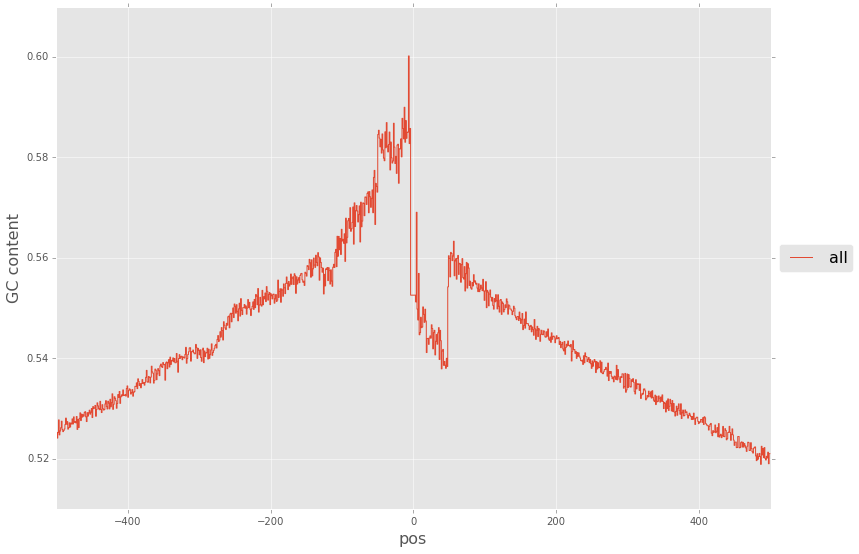

In [5]:
fig,ax=plt.subplots()
fig.set_size_inches(16,9)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

idx=cg_exl_idx
plot_entropy(train_x[idx],ax=ax,label='all')

## Check among annotation groups

In [6]:
annot=pd.read_csv('../explore_data/relevant_annotations.csv',sep='\t',header=None)
annot.columns=['id','Regulatory_Feature_Group','Relation_to_UCSC_CpG_Island',
    'Strand','Infinium_Design_Type','Random_Loci','Methyl27_Loci']
annot.fillna(0,inplace=True)
annot.head()

,id,Regulatory_Feature_Group,Relation_to_UCSC_CpG_Island,Strand,Infinium_Design_Type,Random_Loci,Methyl27_Loci
0,cg00035864,0,0,F,II,0,0
1,cg00050873,0,N_Shore,R,I,0,0
2,cg00061679,0,0,R,II,0,0
3,cg00063477,0,S_Shelf,F,II,0,0
4,cg00121626,0,N_Shore,R,II,0,0


In [7]:
merged=pd.DataFrame(train_id,columns=['id']).merge(annot,on=['id'])

----

## CpG island annotation

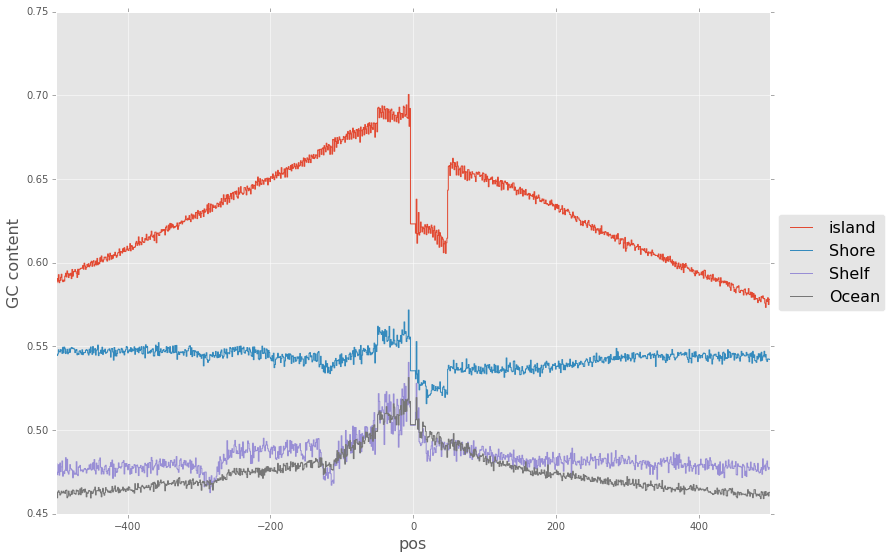

In [8]:
fig,ax=plt.subplots()
fig.set_size_inches(16,9)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#Islands
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[merged.Relation_to_UCSC_CpG_Island=='Island'].index]=True
idx=cg_exl_idx & annot_idx
plot_entropy(train_x[annot_idx],ax=ax,label='island')

#Shores
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[(merged.Relation_to_UCSC_CpG_Island=='N_Shore' ) |
          (merged.Relation_to_UCSC_CpG_Island=='S_Shore' )].index]=True
idx=cg_exl_idx & annot_idx
plot_entropy(train_x[annot_idx],ax=ax,label='Shore')

#Shelves
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[(merged.Relation_to_UCSC_CpG_Island=='N_Shelf' ) |
          (merged.Relation_to_UCSC_CpG_Island=='S_Shelf' )].index]=True
idx=cg_exl_idx & annot_idx
plot_entropy(train_x[annot_idx],ax=ax,label='Shelf')

#No annot
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[merged.Relation_to_UCSC_CpG_Island==0].index]=True
idx=cg_exl_idx & annot_idx
plot_entropy(train_x[annot_idx],ax=ax,label='Ocean')

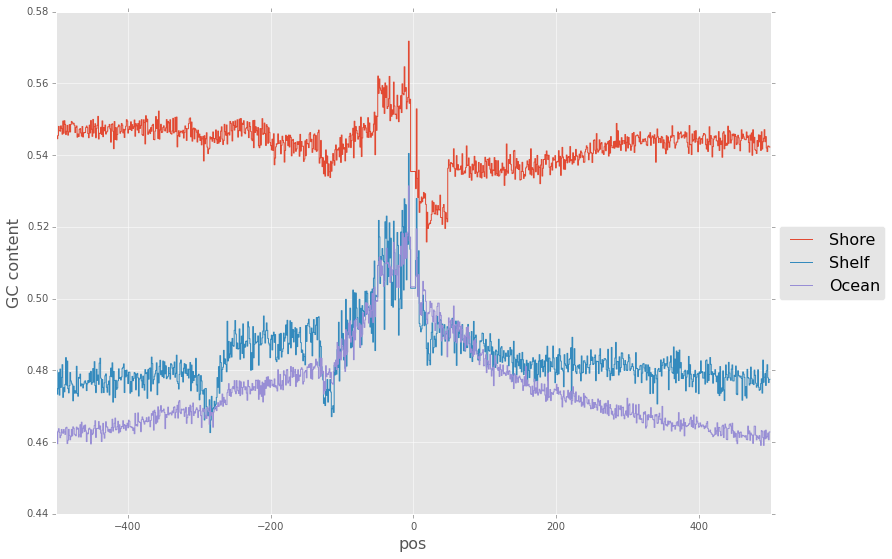

In [9]:
fig,ax=plt.subplots()
fig.set_size_inches(16,9)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#Islands
#no

#Shores
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[(merged.Relation_to_UCSC_CpG_Island=='N_Shore' ) |
          (merged.Relation_to_UCSC_CpG_Island=='S_Shore' )].index]=True
idx=cg_exl_idx & annot_idx
plot_entropy(train_x[annot_idx],ax=ax,label='Shore')

#Shelves
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[(merged.Relation_to_UCSC_CpG_Island=='N_Shelf' ) |
          (merged.Relation_to_UCSC_CpG_Island=='S_Shelf' )].index]=True
idx=cg_exl_idx & annot_idx
plot_entropy(train_x[annot_idx],ax=ax,label='Shelf')

#No annot
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[merged.Relation_to_UCSC_CpG_Island==0].index]=True
idx=cg_exl_idx & annot_idx
plot_entropy(train_x[annot_idx],ax=ax,label='Ocean')

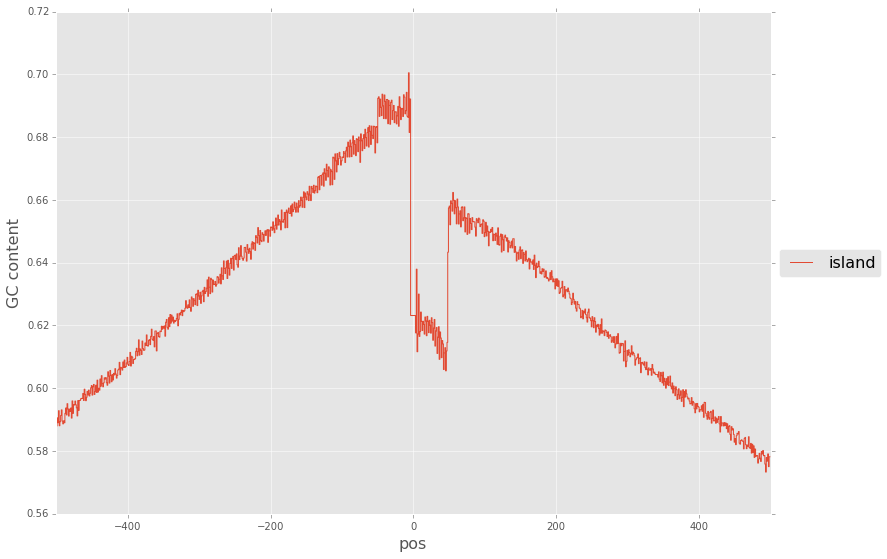

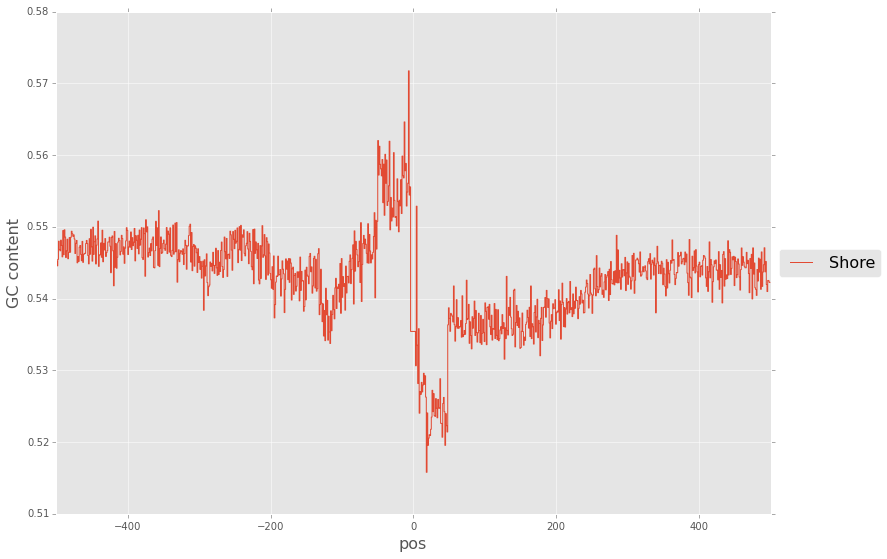

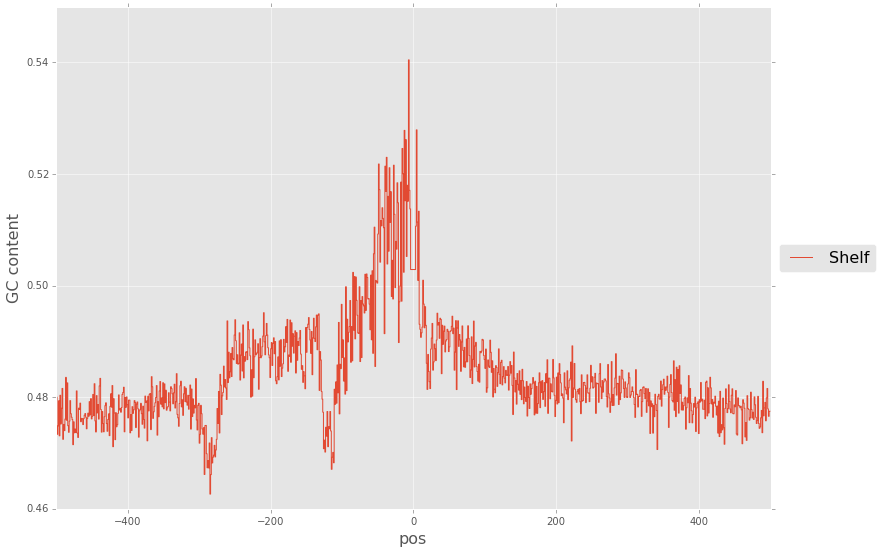

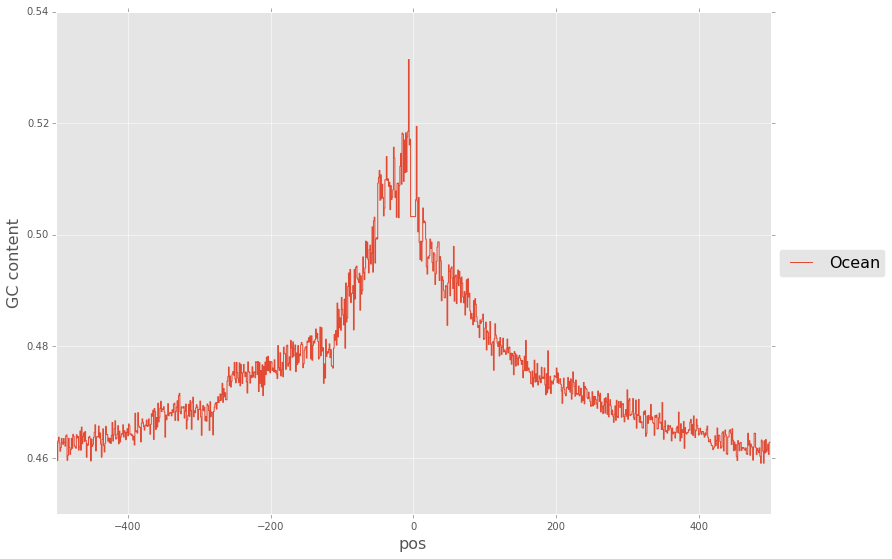

In [10]:
fig,ax=plt.subplots()
fig.set_size_inches(16,9)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#Islands
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[merged.Relation_to_UCSC_CpG_Island=='Island'].index]=True
idx=cg_exl_idx & annot_idx
plot_entropy(train_x[annot_idx],ax=ax,label='island')

fig,ax=plt.subplots()
fig.set_size_inches(16,9)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#Shores
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[(merged.Relation_to_UCSC_CpG_Island=='N_Shore' ) |
          (merged.Relation_to_UCSC_CpG_Island=='S_Shore' )].index]=True
idx=cg_exl_idx & annot_idx
plot_entropy(train_x[annot_idx],ax=ax,label='Shore')

fig,ax=plt.subplots()
fig.set_size_inches(16,9)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#Shelves
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[(merged.Relation_to_UCSC_CpG_Island=='N_Shelf' ) |
          (merged.Relation_to_UCSC_CpG_Island=='S_Shelf' )].index]=True
idx=cg_exl_idx & annot_idx
plot_entropy(train_x[annot_idx],ax=ax,label='Shelf')


fig,ax=plt.subplots()
fig.set_size_inches(16,9)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#No annot
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[merged.Relation_to_UCSC_CpG_Island==0].index]=True
idx=cg_exl_idx & annot_idx
plot_entropy(train_x[annot_idx],ax=ax,label='Ocean')

----

## Promoter annotation

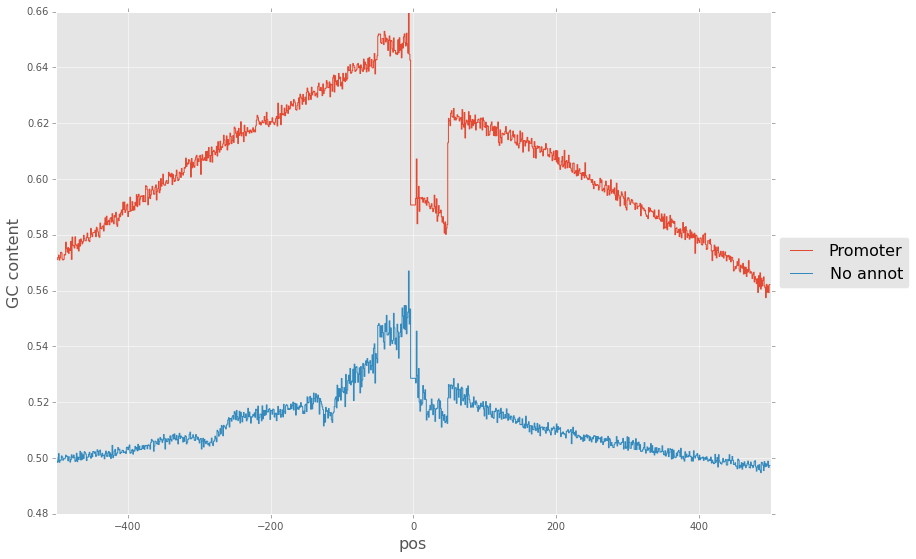

In [11]:
fig,ax=plt.subplots()
fig.set_size_inches(16,9)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#Promoters
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[merged.Regulatory_Feature_Group=='Promoter_Associated'].index]=True
idx=cg_exl_idx & annot_idx
plot_entropy(train_x[annot_idx],ax=ax,label='Promoter')

#No annot
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[merged.Regulatory_Feature_Group==0].index]=True
idx=cg_exl_idx & annot_idx
plot_entropy(train_x[annot_idx],ax=ax,label='No annot')

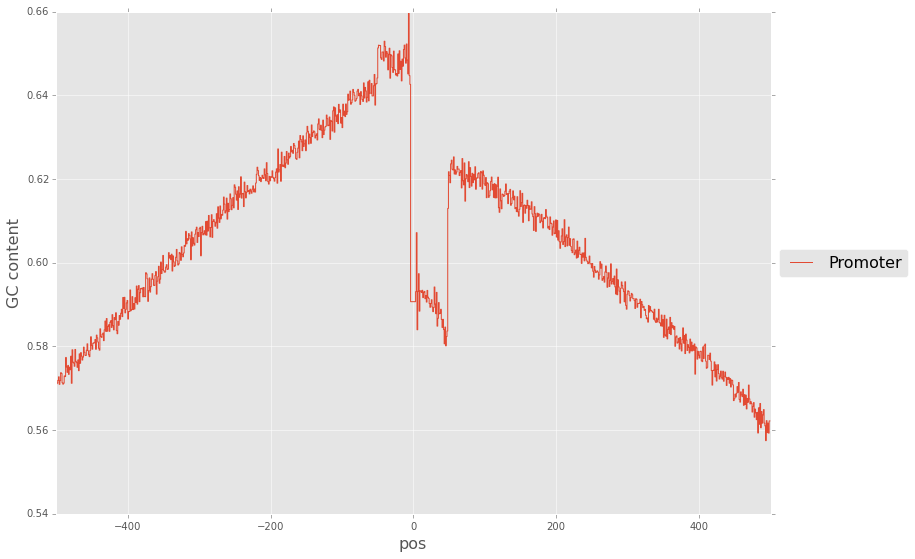

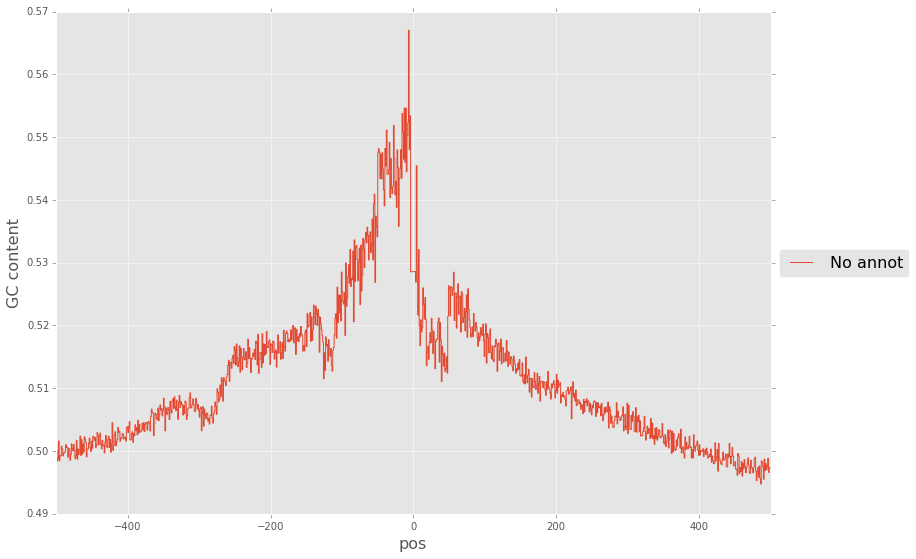

In [12]:
fig,ax=plt.subplots()
fig.set_size_inches(16,9)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#Promoters
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[merged.Regulatory_Feature_Group=='Promoter_Associated'].index]=True
idx=cg_exl_idx & annot_idx
plot_entropy(train_x[annot_idx],ax=ax,label='Promoter')



fig,ax=plt.subplots()
fig.set_size_inches(16,9)
box=ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

#No annot
annot_idx=np.array(np.zeros(len(train_x)),dtype=bool)
annot_idx[merged[merged.Regulatory_Feature_Group==0].index]=True
idx=cg_exl_idx & annot_idx
plot_entropy(train_x[annot_idx],ax=ax,label='No annot')